<a href="https://colab.research.google.com/github/sandeepProject/ICTTestRepo/blob/main/Wine_clustering_UnSuper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from sklearn import cluster
# Load the dataset
df = pd.read_csv('/content/Wine_clust.csv')
cluster =df.copy()
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [134]:
# Check for missing values
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [135]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_df, columns=df.columns)

 ### K-Means Clustering - Find Optimum
  Elbow Method to find where the Within-Cluster Sum of Squares (WCSS)


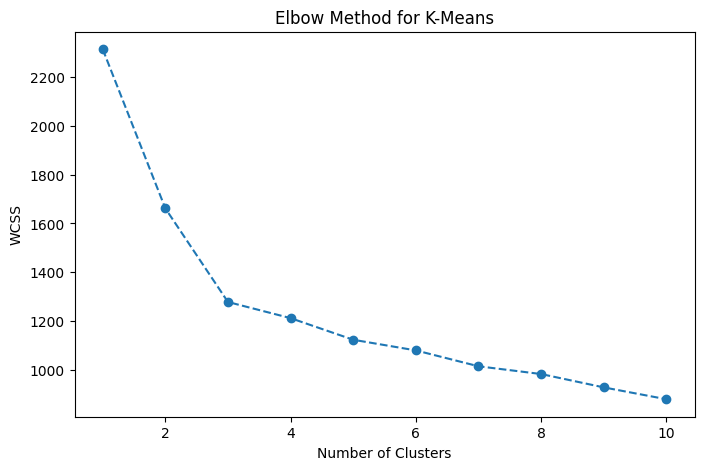

In [136]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [137]:
!pip install kneed

In [138]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(f"The optimal K is: {kl.elbow}")

The optimal K is: 3


In [139]:
# Based on the plot and KneeLocator, n_clusters/K=3 is typically the optimum for this dataset
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans_model.fit_predict(scaled_df)

In [140]:
cluster['KMeans'] = kmeans_labels
cluster.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [141]:
cluster['KMeans'].unique()

array([2, 0, 1], dtype=int32)

K-means using Silhouette score Analysis

In [142]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for k = 2 to 10
sil_score=[]
for i in range(2,10):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  y_kmean = kmeans.fit_predict(scaled_df)
  s_score = silhouette_score(scaled_df,y_kmean)
  sil_score.append(s_score)
  print(f"for k={i}:score={s_score:.4f}")

for k=2:score=0.2650
for k=3:score=0.2849
for k=4:score=0.2542
for k=5:score=0.1836
for k=6:score=0.1690
for k=7:score=0.1726
for k=8:score=0.1625
for k=9:score=0.1739


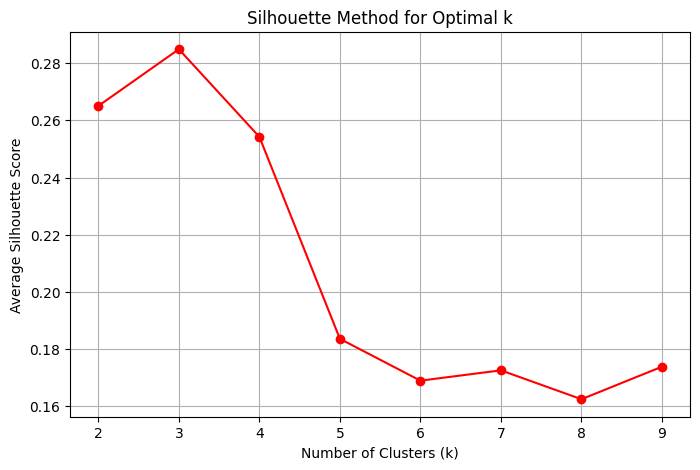

In [143]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
x = range(2,10)
plt.plot(x, sil_score, marker='o', color='red', linestyle='-')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

### Hierarchical Clustering - Find Optimum Clusters

Dendogram

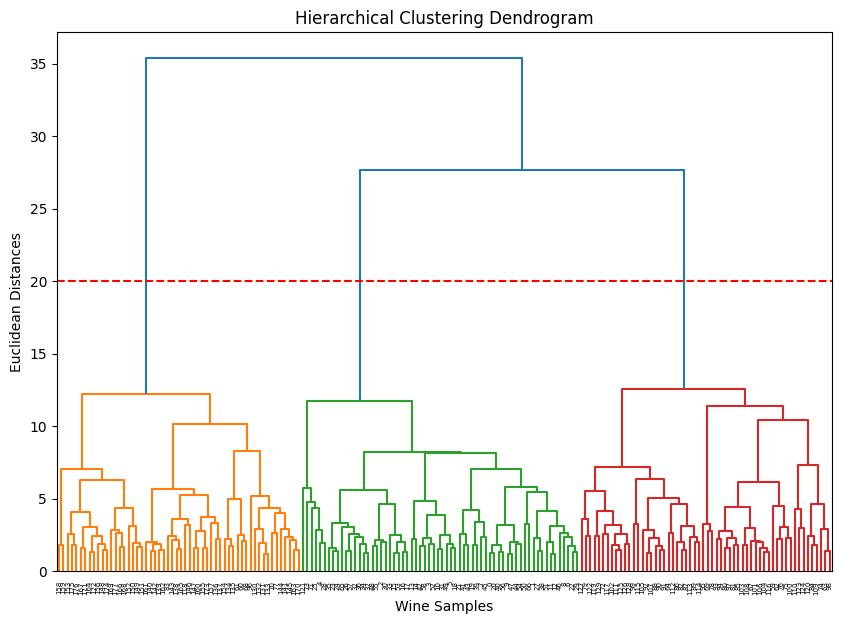

In [144]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
linkage_matrix = linkage(scaled_df, method='ward')
dendrogram(linkage_matrix)
# Add a horizontal line at your chosen threshold
plt.axhline(y=20, color='r', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wine Samples')
plt.ylabel('Euclidean Distances')
plt.show()

If you want to find the
 value associated with a specific distance threshold (
), you can use the fcluster function from scipy

In [145]:
from scipy.cluster.hierarchy import fcluster

# Print K for a specific height
# Adjust 't' (threshold) based on the y-axis of your dendrogram
height_threshold = 20
labels = fcluster(linkage_matrix, t=height_threshold, criterion='distance')
k = len(set(labels))

print(f"At a height of {height_threshold}, the number of clusters (K) is: {k}")

At a height of 20, the number of clusters (K) is: 3


How to find the "Maximum" automatically

In [146]:
# Calculate the distances between merges
distances = linkage_matrix[:, 2]

# The 'jump' is the difference between consecutive merge distances
jumps = np.diff(distances)

# The optimum K is often at the max jump
# We add 2 because indexing starts at 0 and cluster counting starts after the first merge
optimum_k = len(distances) - np.argmax(jumps)
print(f"The mathematical optimum K based on the largest distance jump is: {optimum_k}")


The mathematical optimum K based on the largest distance jump is: 3


### Agglomerative Clustering

In [147]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative model based on the dendrogram (typically 3 clusters)
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_ac = agg_model.fit_predict(scaled_df)

In [148]:
cluster['AHC'] = y_ac
cluster.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans,AHC
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2,2
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,2,2
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,2,2
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,2,2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,2,2


Agglomerative Clustering using silhouette analysis

In [149]:
a_sil= []
k_range = range(2,10)
for k in k_range:
  ac = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
  y_ac = ac.fit_predict(scaled_df)
  s_score = silhouette_score(scaled_df,y_ac)
  a_sil.append(s_score)
  print(f"for k={k}: score:{s_score}")

for k=2: score:0.2670131771272231
for k=3: score:0.2774439826952265
for k=4: score:0.225836659334758
for k=5: score:0.18674235566758707
for k=6: score:0.17966642854438503
for k=7: score:0.18685342560226942
for k=8: score:0.18834697102837825
for k=9: score:0.1917169293227209


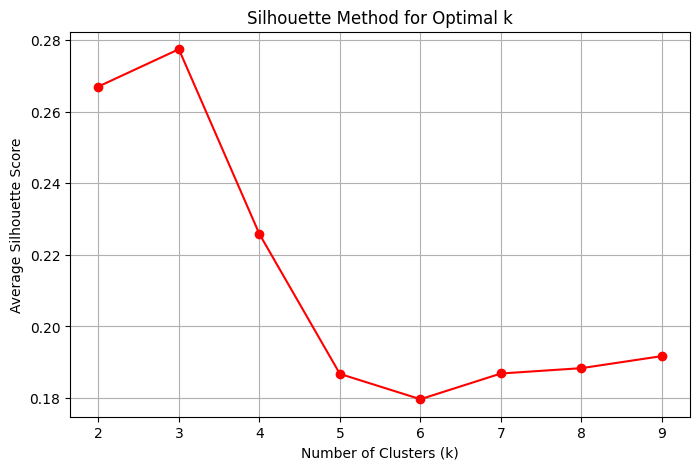

In [150]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
x = range(2,10)
plt.plot(x, a_sil, marker='o', color='red', linestyle='-')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

### Principal Component Analysis (PCA)
to reduce it to 2D for plotting.

In [151]:
# # Plotting the K-Means clusters
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df,s=100, palette='viridis')
# plt.title('K-Means Clusters (PCA)')
# plt.show()

In [152]:
# # Plotting the K-Means clusters
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='Agglo_Cluster', data=pca_df,s=100, palette='viridis')
# plt.title('Agglometrive Clusters (PCA)')
# plt.show()

In [153]:
from sklearn.decomposition import PCA
#  Apply PCA (Keeping enough components to explain ~90% of variance)
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_df)
print(f"Reduced from 13 features to {pca_data.shape[1]} components")

# K-Means on PCA Data
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans_pca.fit_predict(pca_data)

# Agglomerative on PCA Data
agg_pca = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='ward')
agg_labels = agg_pca.fit_predict(pca_data)

# Compare Silhouette Scores
print(f"K-Means Silhouette: , {silhouette_score(pca_data, kmeans_labels):.4f}")
print(f"Agglomerative Silhouette:, {silhouette_score(pca_data, agg_labels):.4f}")

Reduced from 13 features to 8 components
K-Means Silhouette: , 0.3150
Agglomerative Silhouette:, 0.3047


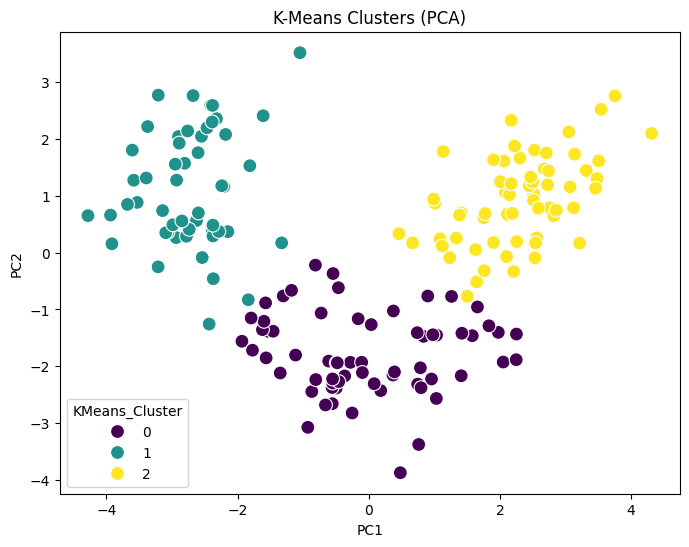

In [154]:
pca = PCA(n_components=2)
pca_data=pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = pca_data,columns=['PC1','PC2'])
pca_df['KMeans_Cluster']=kmeans_labels

# Plotting the K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df,s=100, palette='viridis')
plt.title('K-Means Clusters (PCA)')
plt.show()

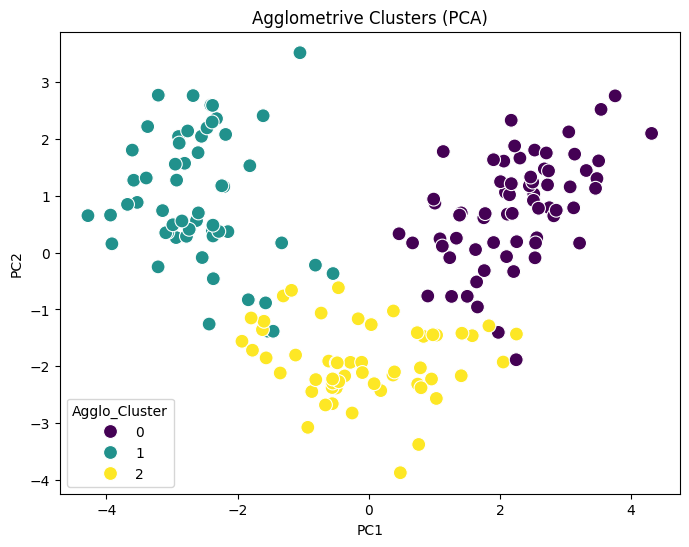

In [155]:
pca = PCA(n_components=2)
pca_data=pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = pca_data,columns=['PC1','PC2'])
pca_df['Agglo_Cluster']=agg_labels

# Plotting the Agglometrive clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Agglo_Cluster', data=pca_df,s=100, palette='viridis')
plt.title('Agglometrive Clusters (PCA)')
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

It doesn't ask for "K"; instead, <br>
it looks for dense areas and marks points in sparse areas as noise (outliers).

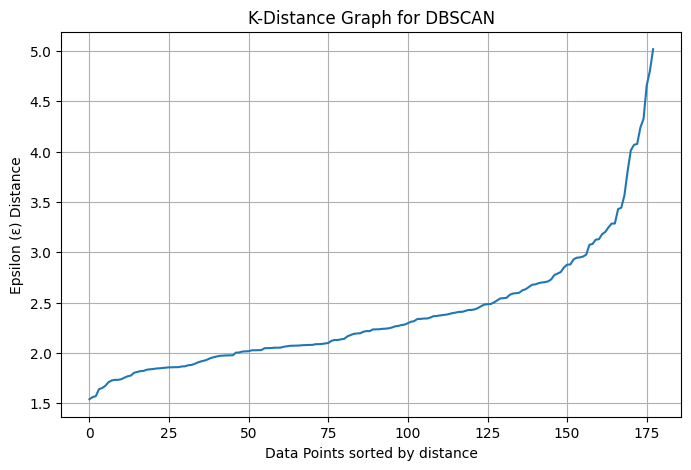

In [156]:
# Finding Optimum Epsilon (K-Distance Graph)
# use the Nearest Neighbors algorithm
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Use MinPts = 5  (common starting point)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

# Sort distances and plot
distances = np.sort(distances[:, 4], axis=0) # 4 is the index of the 5th neighbor
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (ε) Distance')
plt.grid(True)
plt.show()

In [157]:
from sklearn.cluster import DBSCAN
# Creating the model
# eps: distance from the graph above 2.0 - 3.2
# min_samples: same as n_neighbors used in the graph
for e in [3.3,3.2,3.1,3.0,2.9,2.5, 2.3, 2.1, 1.9, 1.7]:
    dbscan = DBSCAN(eps=e, min_samples=5)
    labels = dbscan.fit_predict(scaled_df)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Eps: {e} | Clusters: {n_clusters} | Noise: {n_noise}")

Eps: 3.3 | Clusters: 1 | Noise: 8
Eps: 3.2 | Clusters: 1 | Noise: 8
Eps: 3.1 | Clusters: 1 | Noise: 9
Eps: 3.0 | Clusters: 1 | Noise: 11
Eps: 2.9 | Clusters: 1 | Noise: 12
Eps: 2.5 | Clusters: 1 | Noise: 24
Eps: 2.3 | Clusters: 2 | Noise: 42
Eps: 2.1 | Clusters: 3 | Noise: 62
Eps: 1.9 | Clusters: 6 | Noise: 103
Eps: 1.7 | Clusters: 6 | Noise: 145


In [158]:
# # Initialize the models with the optimum parameters found
# models = {
#     "K-Means (K=3)": KMeans(n_clusters=3, init='k-means++', random_state=42),
#     "Agglomerative (K=3)": AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='ward'),
#     # "DBSCAN (eps=2.1)": DBSCAN(eps=2.1, min_samples=5)
# }

# results = []

# # Loop through models to calculate scores
# for name, model in models.items():
#     labels = model.fit_predict(scaled_df)
#     score = silhouette_score(scaled_df, labels)

#     results.append({"Model": name, "Silhouette Score": round(score, 4)})

# # Display the Comparison Table
# comparison_df = pd.DataFrame(results)
# print(comparison_df.sort_values(by="Silhouette Score", ascending=False))